##DAILY EXERCISE

Mini-project 1 : Machine Learning
Last Updated: December 7th, 2023

Mini-project 1 : Machine Learning for Mental Health


What you will learn
Data loading and exploration with Pandas.
Preprocessing techniques including cleaning data.


Instructions :
Using the Mental Health dataset and what you have learn this week, answer the following questions :

What is the distribution of mental health conditions among different age groups in the tech industry?
How does the frequency of mental health issues vary by gender?
Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.


Ressources
Use the Mental Health in Tech Survey dataset available on Kaggle.



Hint
Introduction to the Dataset:

Download the dataset from Kaggle.
Load the dataset using Pandas.
Perform initial exploration to understand the dataset structure : whats the distribution of the data? What types of data do i have?
Data Cleaning:

Identify and handle missing values.
Detect and correct any inconsistencies in the data.
Drop irrelevant columns if necessary.


In [1]:
import pandas as pd
df = pd.read_csv('/content/survey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# to calculate missing values per column
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [ ]:
df.describe() #damn only age is integer

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
# lets see how distributed our data is as part of exploration
df['Age'].value_counts() # --> spotted junk here, crazy ages
df['Gender'].value_counts()
df['Country'].value_counts()

,count
Age,
29,85
32,82
26,75
27,71
33,70
28,68
31,67
34,65
30,63


In [ ]:
#there is data to ble cleaned in age column

# Step 1: Convert the Age column to numeric, forcing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 2: Identify any remaining non-numeric values (they should be NaN after conversion)
non_numeric_ages = df[df['Age'].isna()]
print("Non-numeric age entries:", non_numeric_ages)

# Step 3: Drop rows with NaN in Age column
df = df.dropna(subset=['Age'])

# Step 4: Identify the valid range and compute the median age
valid_ages = df[(df['Age'] >= 18) & (df['Age'] <= 72)]
median_age = valid_ages['Age'].median()

# Step 5: Replace outliers with the median age
df['Age'] = df['Age'].apply(lambda x: median_age if x < 18 or x > 72 else x)

# Verify the replacement
print(df['Age'].describe())


Non-numeric age entries: Empty DataFrame
Columns: [Timestamp, Age, Gender, Country, state, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments]
Index: []

[0 rows x 27 columns]
count    1254.000000
mean       32.074163
std         7.279732
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


Distribution of Mental Health Conditions by Age Group

In [ ]:
# Define age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of people in each age group who have sought treatment
age_group_distribution = df.groupby('age_group')['treatment'].value_counts(normalize=True).unstack().fillna(0)
age_group_distribution


<ipython-input-25-835cac3ce9a1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_distribution = df.groupby('age_group')['treatment'].value_counts(normalize=True).unstack().fillna(0)


treatment,No,Yes
age_group,,
0-18,0.000000,0.000000
19-25,0.551282,0.448718
26-35,0.511268,0.488732
36-45,0.453125,0.546875
46-55,0.431373,0.568627
56-65,0.266667,0.733333
65+,0.500000,0.500000


Throwing a histagram here to see distribtuion

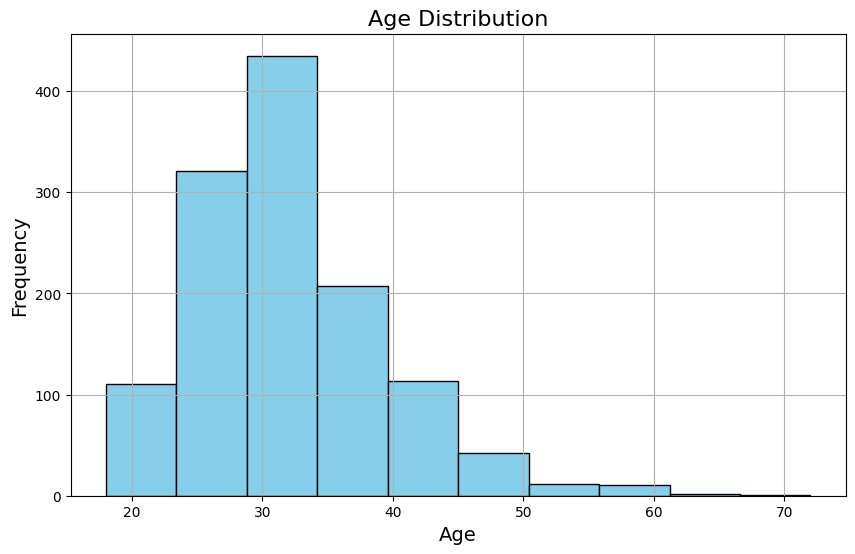

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')

# Step 2: Add titles and labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Step 3: Show the plot
plt.grid(True)
plt.show()


Cleaning Gender Categories to be Male Female or Other

In [ ]:
# Simplify gender categories
def simplify_gender(gender: str) -> str:
    if 'female' in gender or 'woman' in gender or 'fem' in gender:
        return 'Female'
    elif 'male' in gender or 'man' in gender or 'guy' in gender:
        return 'Male'
    else:
        return 'Non-binary/Other'

df['Gender'] = df['Gender'].apply(simplify_gender)

# Re-analyze the distribution of treatment-seeking behavior by gender
simplified_gender_distribution = df.groupby('Gender')['treatment'].value_counts(normalize=True).unstack().fillna(0)
simplified_gender_distribution


treatment,No,Yes
Gender,,
Female,0.268657,0.731343
Male,0.460177,0.539823
Non-binary/Other,0.527123,0.472877


Identifying Countries with Highest and Lowest Reported Rates of Mental Health Issues

In [ ]:
# Calculate the percentage of respondents who sought treatment by country
country_treatment_rates = df.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Identify countries with the highest and lowest treatment rates
highest_treatment_rates = country_treatment_rates['Yes'].nlargest(5)
lowest_treatment_rates = country_treatment_rates['Yes'].nsmallest(5)

highest_treatment_rates.head, lowest_treatment_rates
#but this is misleadings since those countries had very few correspondents


(<bound method NDFrame.head of Country
 Bahamas, The    1.0
 Croatia         1.0
 Denmark         1.0
 Japan           1.0
 Moldova         1.0
 Name: Yes, dtype: float64>,
 Country
 Austria                   0.0
 Bosnia and Herzegovina    0.0
 China                     0.0
 Colombia                  0.0
 Costa Rica                0.0
 Name: Yes, dtype: float64)

## DAILY CHALLENGE

In [5]:
df = pd.read_csv('/content/datascience_salaries.csv')
df.info()
# you can open the file from the left sidebar and see it (trick from Jeremy Ansel)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


Identify and differentiate between structured and unstructured data within the dataset, and discuss how this impacts your analysis approach.

The question is a bit strange to me, the whole dataset is structured obviously. Maybe I'm missing something.

In [6]:
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [8]:
missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()

print("Missing Values:")
print(missing_values)
print("\nDuplicate Rows:", duplicate_rows)

Missing Values:
Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

Duplicate Rows: 0


Grouping

In [17]:
# Group the data by 'experience_level' and calculate the mean and median salaries for each group
grouped_data = df.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()
grouped_data
# PAY ATTENTION TO RESETING INDEX HERE
# Another way to reset the index: add second argument in groupby function "as_index=False"
# Why do we reset the index -  experience_level becomes the index of grouped_data = ceases to be column
# As consequence the DataFrame will have only two columns: mean and median.
# So you lost experience level column, you cant plot it out, compute on it etc.


,experience_level,mean,median
0,Entry,36111.111111,30000.0
1,Executive,76076.923077,46000.0
2,Mid,51786.885246,51000.0
3,Senior,75088.033012,68000.0


In [19]:
grouped_data.columns

Index(['experience_level', 'mean', 'median'], dtype='object')

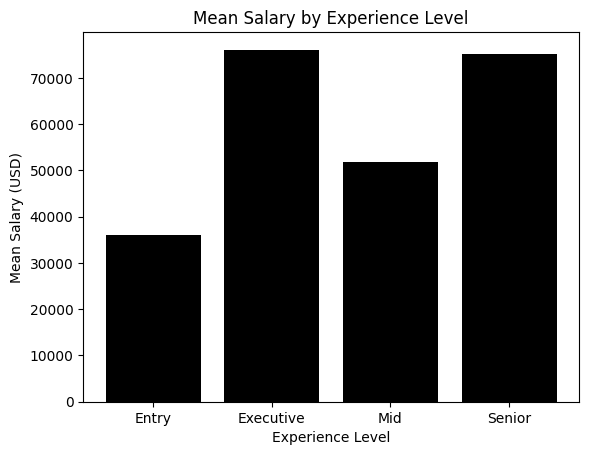

In [24]:
import matplotlib.pyplot as plt

# Plotting the bar chart
# plt.bar (X AXIS, Y AXIS)
plt.bar(grouped_data['experience_level'], grouped_data['mean'], color='black')

# Adding labels and title
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Experience Level')
plt.show()
